In [1]:
import daft
from matplotlib import rc

In [6]:
rc("font", family="serif", size=9)
rc("text", usetex=True)
rc("text.latex", preamble=r"\usepackage{amsmath}")

## Example

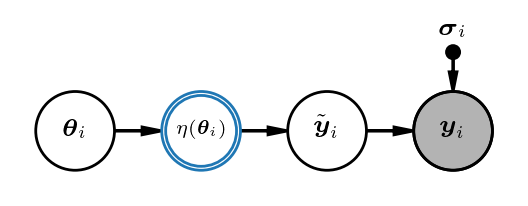

In [13]:
node_params = {'facecolor': 'white'}

# Instantiate the PGM.
pgm = daft.PGM()


# Parameters
pgm.add_node("x", r"$\boldsymbol{\theta}_i$", 1., 3.5, plot_params=node_params)

# Neural network
pgm.add_node('net', r'$\eta(\boldsymbol{\theta}_i)$', 1.8, 3.5, fontsize=7,
             alternate=True,
#              shape='rectangle',
             plot_params={'edgecolor': 'C0'}
            )

# Latent variables
pgm.add_node("y", r"$\tilde{\boldsymbol{y}}_i$", 2.6, 3.5, plot_params=node_params)

# Data
pgm.add_node("yobs", r"$\boldsymbol{y}_i$", 3.4, 3.5, observed=True)

# Uncertainties
pgm.add_node("sigma", r"$\boldsymbol{\sigma}_i$", 3.4, 4., fixed=True)

pgm.add_edge("x", "net")
pgm.add_edge("net", "y")
pgm.add_edge("y", "yobs")
pgm.add_edge("sigma", "yobs")

pgm.render(dpi=200)

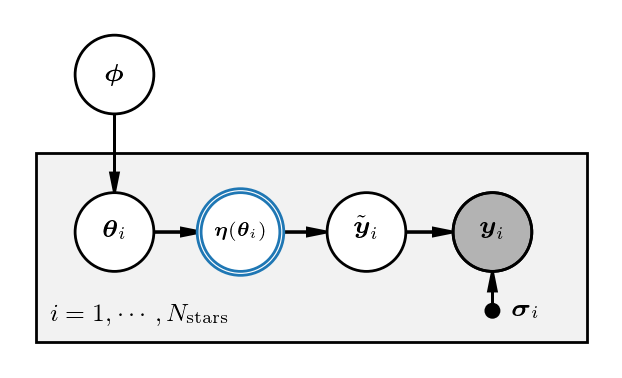

In [58]:
node_params = {'facecolor': 'white'}

# Instantiate the PGM.
pgm = daft.PGM(alternate_style='outer')

pgm.add_node("phi", r"$\boldsymbol{\phi}$", 1., 4.5, plot_params=dict(**node_params,
#                                                                      edgecolor='C1', 
                                                                     ))


# Parameters
pgm.add_node("x", r"$\boldsymbol{\theta}_i$", 1., 3.5, plot_params=node_params)

# Neural network
pgm.add_node('net', r'$\boldsymbol{\eta}(\boldsymbol{\theta}_i)$', 1.8, 3.5, fontsize=7,
             alternate=True,
#              shape='rectangle',
             plot_params={'edgecolor': 'C0', 'facecolor': 'white'}
            )

# Latent variables
pgm.add_node("y", r"$\tilde{\boldsymbol{y}}_i$", 2.6, 3.5, plot_params=node_params)

# Data
pgm.add_node("yobs", r"$\boldsymbol{y}_i$", 3.4, 3.5, observed=True)

# Uncertainties
pgm.add_node("sigma", r"$\boldsymbol{\sigma}_i$", 3.4, 3, fixed=True, offset=[12, -8])

pgm.add_edge("phi", "x")  # , plot_params={'facecolor': 'C1', 'edgecolor': 'C1'})
pgm.add_edge("x", "net")
pgm.add_edge("net", "y")
pgm.add_edge("y", "yobs")
pgm.add_edge("sigma", "yobs")

pgm.add_plate([0.5, 2.8, 3.5, 1.2], label=r"$i = 1, \cdots, N_\mathrm{stars}$", shift=0, position='bottom left',
              rect_params={'facecolor': '0.95'},
             )

pgm.render(dpi=200)

### Save

In [59]:
pgm.savefig("pgms/hbm_pgm.pdf")
pgm.savefig("pgms/hbm_pgm.png", dpi=200)

In [60]:
pgm.savefig("../paper/figures/hbm_pgm.png", dpi=200)